<a href="https://colab.research.google.com/github/guilhermelaviola/MovieRatingAnalysis/blob/main/MovieRatingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-2-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [4]:
# Importing the dataset and displying the first 10 rows:
df = pd.read_excel('RATINGS.xlsx')
df.head()

Your Rating Date Rated                      Title  \
0          6.0 2024-05-09          A Boy and His Dog   
1          7.0 2024-05-09          The Monster Squad   
2          7.0 2024-05-08                   D.C. Cab   
3         10.0 2024-05-06  The Man Who Knew Too Much   
4          8.0 2024-05-05              Lilo & Stitch   

              Original Title Title Type  IMDb Rating  Runtime (mins)    Year  \
0          A Boy and His Dog      Movie          6.4            91.0  1975.0   
1          The Monster Squad      Movie          6.9            82.0  1987.0   
2                   D.C. Cab      Movie          5.5           100.0  1983.0   
3  The Man Who Knew Too Much      Movie          7.4           120.0  1956.0   
4              Lilo & Stitch      Movie          7.3            85.0  2002.0   

                                              Genres  Num Votes  \
0                    Drama, Thriller, Comedy, Sci-Fi    19264.0   
1                    Action, Fantasy, Horror, Comedy    35343.0   
2                                     Comedy, Action     5268.0   
3                                    Drama, Thriller    69675.0   
4  Animation, Adventure, Comedy, Drama, Fantasy, ...   212000.0   

          Release Date                   Directors  
0  1975-11-14 00:00:00                  L.Q. Jones  
1  1987-08-14 00:00:00                 Fred Dekker  
2  1983-12-16 00:00:00             Joel Schumacher  
3  1956-06-01 00:00:00            Alfred Hitchcock  
4  2002-06-21 00:00:00  Dean DeBlois,Chris Sanders

In [5]:
# Displaying the number of rows and columns in the dataset:
df.shape

(2602, 12)

In [6]:
# Displaying the datatypes of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Your Rating     2602 non-null   float64       
 1   Date Rated      2601 non-null   datetime64[ns]
 2   Title           2601 non-null   object        
 3   Original Title  2601 non-null   object        
 4   Title Type      2601 non-null   object        
 5   IMDb Rating     2602 non-null   float64       
 6   Runtime (mins)  2584 non-null   float64       
 7   Year            2601 non-null   float64       
 8   Genres          2601 non-null   object        
 9   Num Votes       2602 non-null   float64       
 10  Release Date    2601 non-null   object        
 11  Directors       2573 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 244.1+ KB


In [12]:
df[['Your Rating']].mean()

Your Rating    7.695886
dtype: float64

In [15]:
df[['IMDb Rating']].mean()


IMDb Rating    6.566128
dtype: float64

In [16]:
df[['Runtime (mins)']].mean()

Runtime (mins)    107.726287
dtype: float64

In [17]:
df[['Num Votes']].mean()

Num Votes    132860.278739
dtype: float64

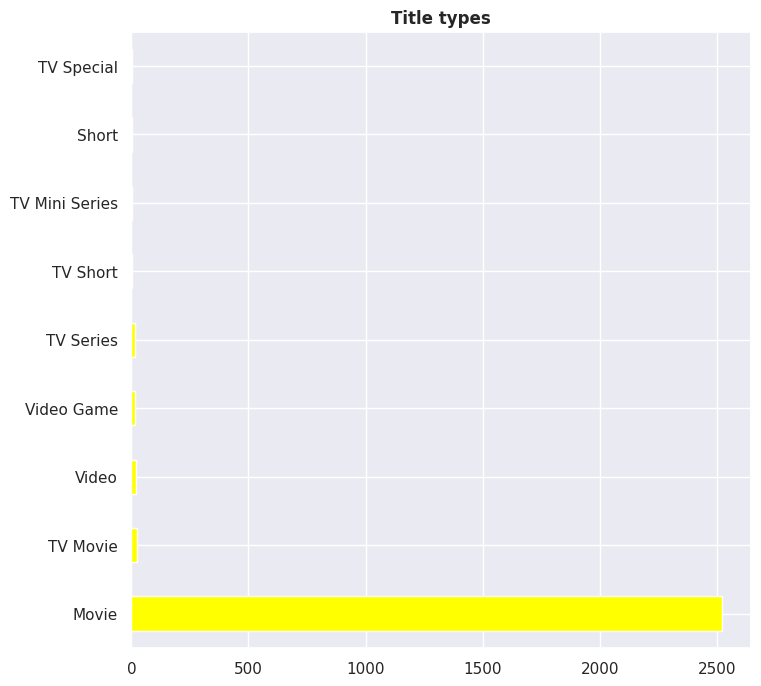

In [18]:
# Displaying the title types present in the dataset:
df['Title Type'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [19]:
# Creating a datetime object based on the dates from the dataset:
df['Date Rated'] = df['Date Rated'].map(pd.to_datetime)
df['Day Rated'] = df['Date Rated'].apply(lambda x : x.day)
df['Month Rated'] = df['Date Rated'].apply(lambda x : x.month)
df['Year Rated'] = df['Date Rated'].apply(lambda x : x.year)

# Displaying the datatypes of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Your Rating     2602 non-null   float64       
 1   Date Rated      2601 non-null   datetime64[ns]
 2   Title           2601 non-null   object        
 3   Original Title  2601 non-null   object        
 4   Title Type      2601 non-null   object        
 5   IMDb Rating     2602 non-null   float64       
 6   Runtime (mins)  2584 non-null   float64       
 7   Year            2601 non-null   float64       
 8   Genres          2601 non-null   object        
 9   Num Votes       2602 non-null   float64       
 10  Release Date    2601 non-null   object        
 11  Directors       2573 non-null   object        
 12  Day Rated       2601 non-null   float64       
 13  Month Rated     2601 non-null   float64       
 14  Year Rated      2601 non-null   float64       
dtypes: d

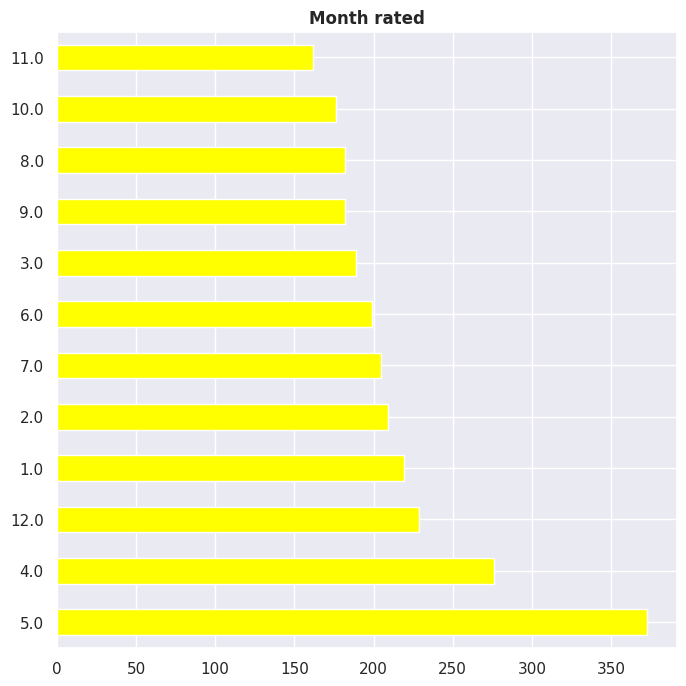

In [20]:
# Displaying distibution of months in which movies were added to the dataset:
df['Month Rated'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Month rated', fontweight = 'bold')
plt.show()

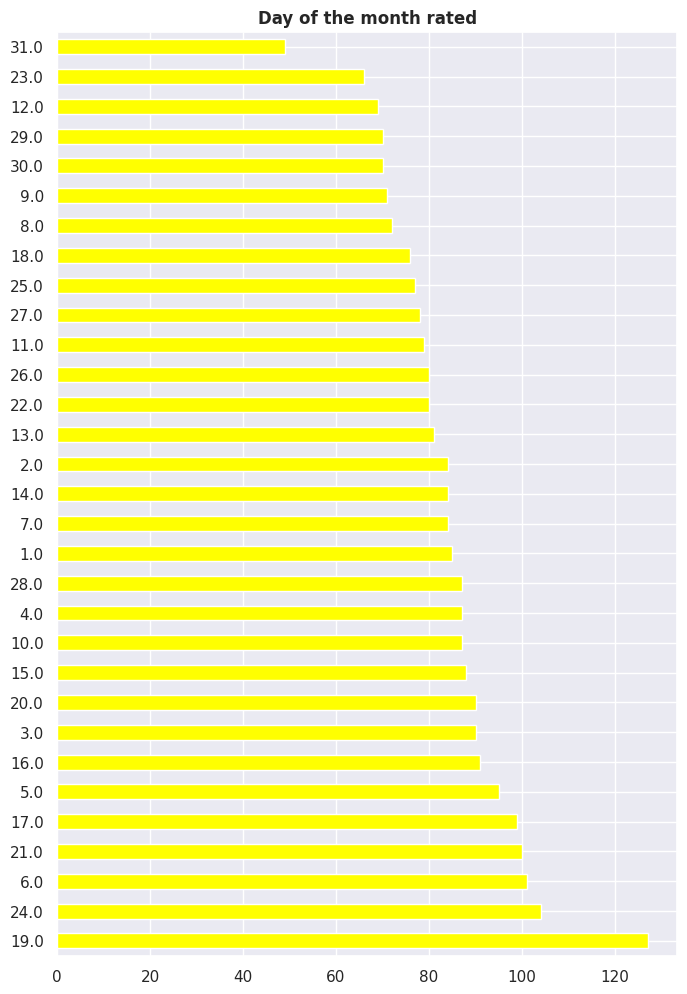

In [21]:
# Displaying distibution of days in which movies were added to the dataset:
df['Day Rated'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 12))
plt.ylabel(None)
plt.title('Day of the month rated', fontweight = 'bold')
plt.show()

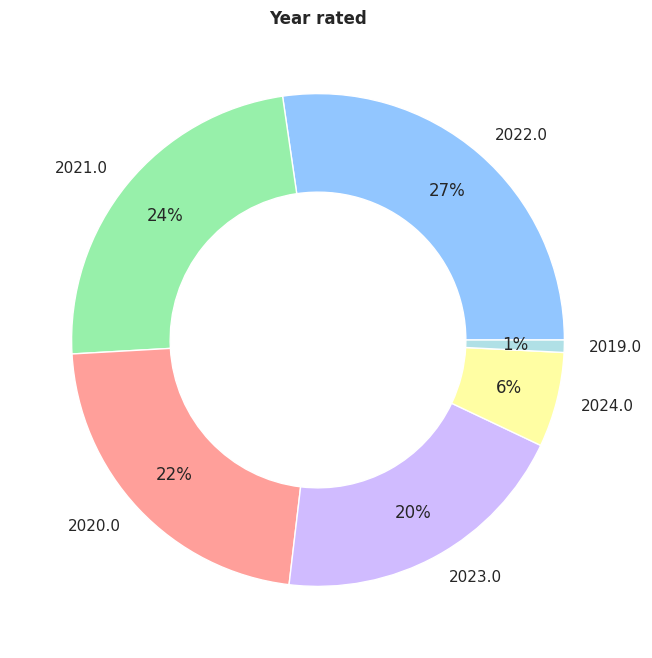

In [22]:
# Displaying distibution of years in which movies were added to the dataset:
df['Year Rated'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year rated', fontweight = 'bold')
plt.show()

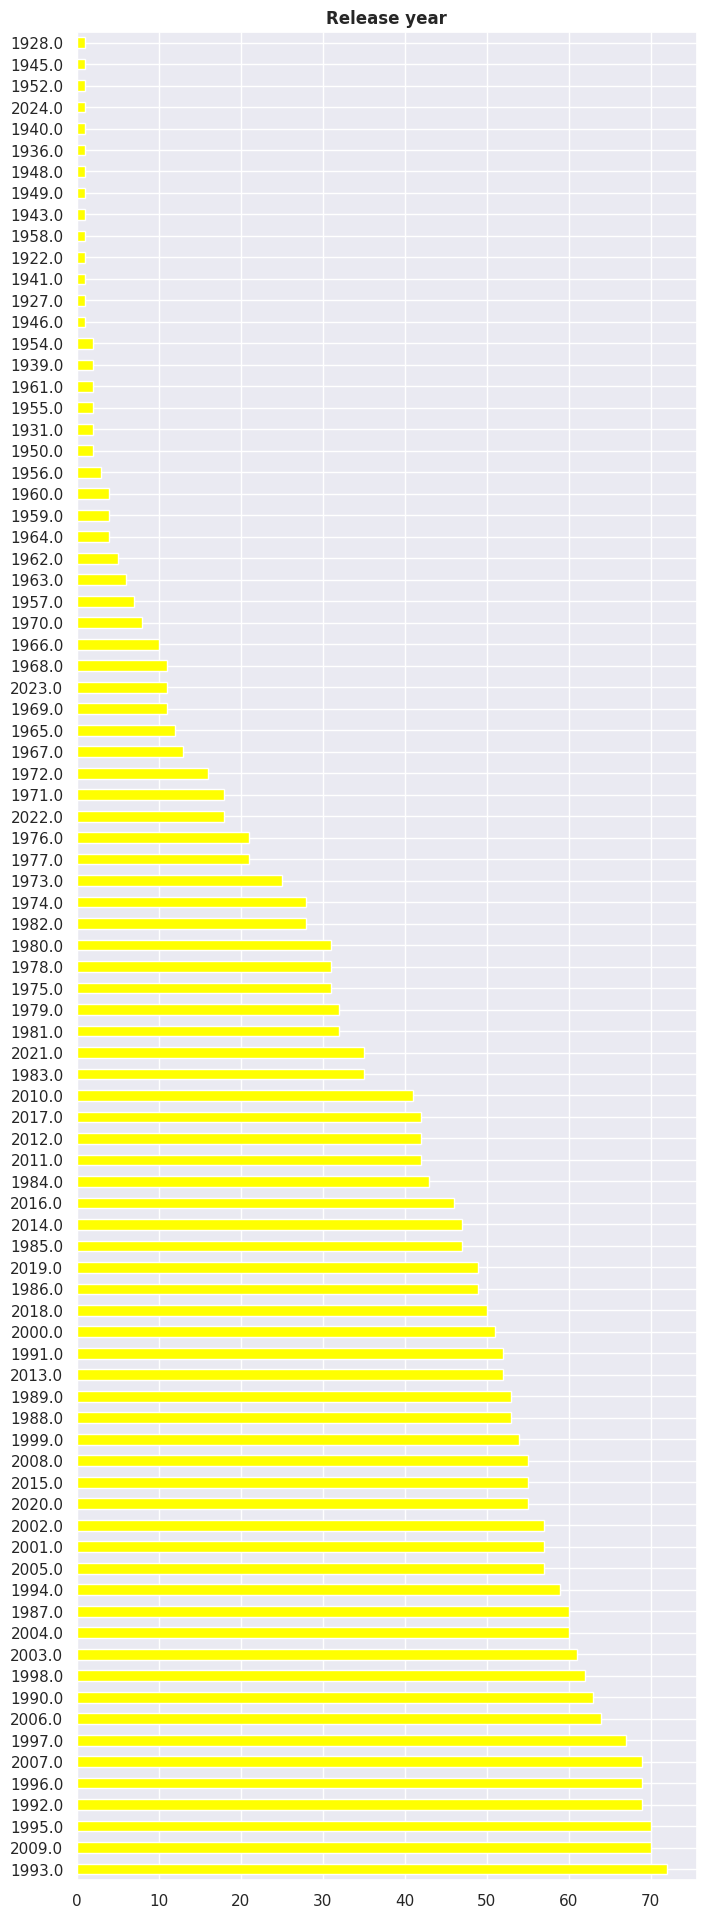

In [23]:
# Displaying distibution of release years in the dataset:
df['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release year', fontweight = 'bold')
plt.show()

In [24]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
df['Decade'] = df['Year'].apply(movies_by_decade)
df.head()

Your Rating Date Rated                      Title  \
0          6.0 2024-05-09          A Boy and His Dog   
1          7.0 2024-05-09          The Monster Squad   
2          7.0 2024-05-08                   D.C. Cab   
3         10.0 2024-05-06  The Man Who Knew Too Much   
4          8.0 2024-05-05              Lilo & Stitch   

              Original Title Title Type  IMDb Rating  Runtime (mins)    Year  \
0          A Boy and His Dog      Movie          6.4            91.0  1975.0   
1          The Monster Squad      Movie          6.9            82.0  1987.0   
2                   D.C. Cab      Movie          5.5           100.0  1983.0   
3  The Man Who Knew Too Much      Movie          7.4           120.0  1956.0   
4              Lilo & Stitch      Movie          7.3            85.0  2002.0   

                                              Genres  Num Votes  \
0                    Drama, Thriller, Comedy, Sci-Fi    19264.0   
1                    Action, Fantasy, Horror, Comedy    35343.0   
2                                     Comedy, Action     5268.0   
3                                    Drama, Thriller    69675.0   
4  Animation, Adventure, Comedy, Drama, Fantasy, ...   212000.0   

          Release Date                   Directors  Day Rated  Month Rated  \
0  1975-11-14 00:00:00                  L.Q. Jones        9.0          5.0   
1  1987-08-14 00:00:00                 Fred Dekker        9.0          5.0   
2  1983-12-16 00:00:00             Joel Schumacher        8.0          5.0   
3  1956-06-01 00:00:00            Alfred Hitchcock        6.0          5.0   
4  2002-06-21 00:00:00  Dean DeBlois,Chris Sanders        5.0          5.0   

   Year Rated Decade  
0      2024.0  1970s  
1      2024.0  1980s  
2      2024.0  1980s  
3      2024.0  1950s  
4      2024.0  2000s

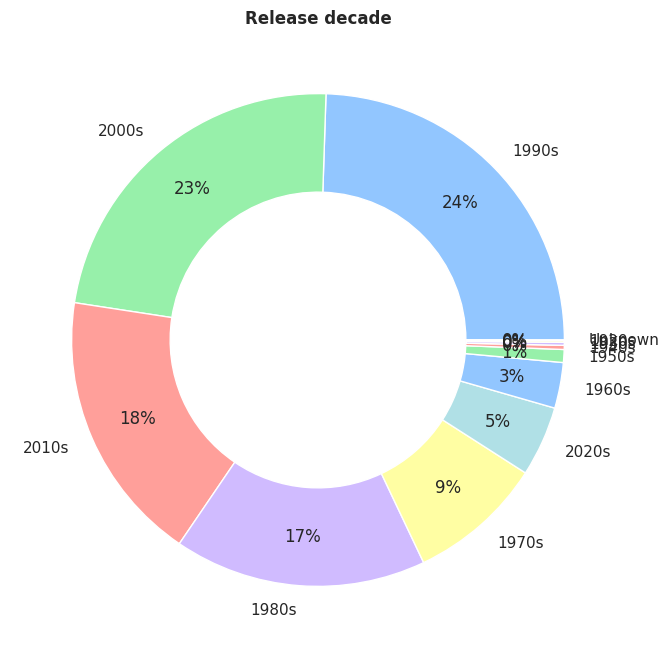

In [25]:
# Displaying the decades the movies were released in:
df['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Release decade', fontweight = 'bold')
plt.show()

In [26]:
# Classifying the movies by quality based on their IMDb rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Average'
  elif rating >= 4 and rating < 5:
    quality = 'Poor'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quality'] = df['IMDb Rating'].apply(imdb_rating)
df.head()

Your Rating Date Rated                      Title  \
0          6.0 2024-05-09          A Boy and His Dog   
1          7.0 2024-05-09          The Monster Squad   
2          7.0 2024-05-08                   D.C. Cab   
3         10.0 2024-05-06  The Man Who Knew Too Much   
4          8.0 2024-05-05              Lilo & Stitch   

              Original Title Title Type  IMDb Rating  Runtime (mins)    Year  \
0          A Boy and His Dog      Movie          6.4            91.0  1975.0   
1          The Monster Squad      Movie          6.9            82.0  1987.0   
2                   D.C. Cab      Movie          5.5           100.0  1983.0   
3  The Man Who Knew Too Much      Movie          7.4           120.0  1956.0   
4              Lilo & Stitch      Movie          7.3            85.0  2002.0   

                                              Genres  Num Votes  \
0                    Drama, Thriller, Comedy, Sci-Fi    19264.0   
1                    Action, Fantasy, Horror, Comedy    35343.0   
2                                     Comedy, Action     5268.0   
3                                    Drama, Thriller    69675.0   
4  Animation, Adventure, Comedy, Drama, Fantasy, ...   212000.0   

          Release Date                   Directors  Day Rated  Month Rated  \
0  1975-11-14 00:00:00                  L.Q. Jones        9.0          5.0   
1  1987-08-14 00:00:00                 Fred Dekker        9.0          5.0   
2  1983-12-16 00:00:00             Joel Schumacher        8.0          5.0   
3  1956-06-01 00:00:00            Alfred Hitchcock        6.0          5.0   
4  2002-06-21 00:00:00  Dean DeBlois,Chris Sanders        5.0          5.0   

   Year Rated Decade  Quality  
0      2024.0  1970s     Okay  
1      2024.0  1980s     Okay  
2      2024.0  1980s  Average  
3      2024.0  1950s     Good  
4      2024.0  2000s     Good

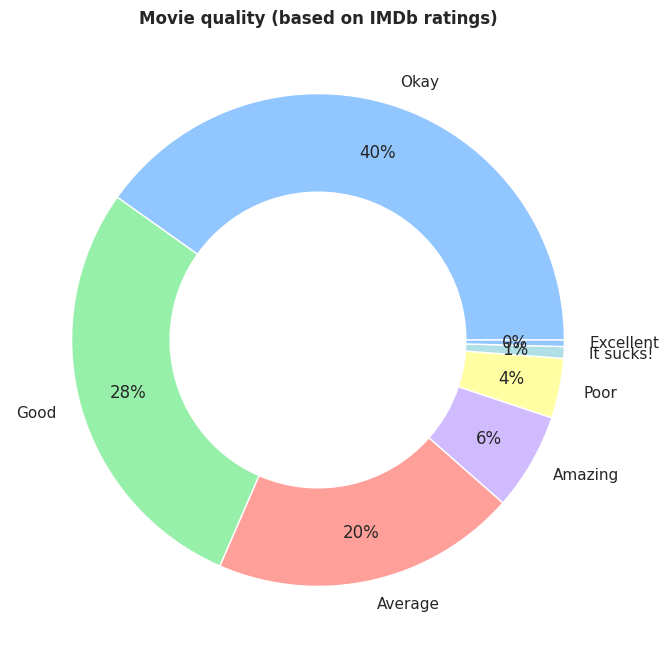

In [27]:
# Displaying the movie rating classification based on the algorithm above:
df['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality (based on IMDb ratings)', fontweight = 'bold')
plt.show()

In [28]:
# Classifying the movies by quality based on the rating I've given:
def my_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Average'
  elif rating >= 4 and rating < 5:
    quality = 'Poor'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quality'] = df['Your Rating'].apply(my_rating)
df.head()

Your Rating Date Rated                      Title  \
0          6.0 2024-05-09          A Boy and His Dog   
1          7.0 2024-05-09          The Monster Squad   
2          7.0 2024-05-08                   D.C. Cab   
3         10.0 2024-05-06  The Man Who Knew Too Much   
4          8.0 2024-05-05              Lilo & Stitch   

              Original Title Title Type  IMDb Rating  Runtime (mins)    Year  \
0          A Boy and His Dog      Movie          6.4            91.0  1975.0   
1          The Monster Squad      Movie          6.9            82.0  1987.0   
2                   D.C. Cab      Movie          5.5           100.0  1983.0   
3  The Man Who Knew Too Much      Movie          7.4           120.0  1956.0   
4              Lilo & Stitch      Movie          7.3            85.0  2002.0   

                                              Genres  Num Votes  \
0                    Drama, Thriller, Comedy, Sci-Fi    19264.0   
1                    Action, Fantasy, Horror, Comedy    35343.0   
2                                     Comedy, Action     5268.0   
3                                    Drama, Thriller    69675.0   
4  Animation, Adventure, Comedy, Drama, Fantasy, ...   212000.0   

          Release Date                   Directors  Day Rated  Month Rated  \
0  1975-11-14 00:00:00                  L.Q. Jones        9.0          5.0   
1  1987-08-14 00:00:00                 Fred Dekker        9.0          5.0   
2  1983-12-16 00:00:00             Joel Schumacher        8.0          5.0   
3  1956-06-01 00:00:00            Alfred Hitchcock        6.0          5.0   
4  2002-06-21 00:00:00  Dean DeBlois,Chris Sanders        5.0          5.0   

   Year Rated Decade    Quality  
0      2024.0  1970s       Okay  
1      2024.0  1980s       Good  
2      2024.0  1980s       Good  
3      2024.0  1950s  Excellent  
4      2024.0  2000s    Amazing

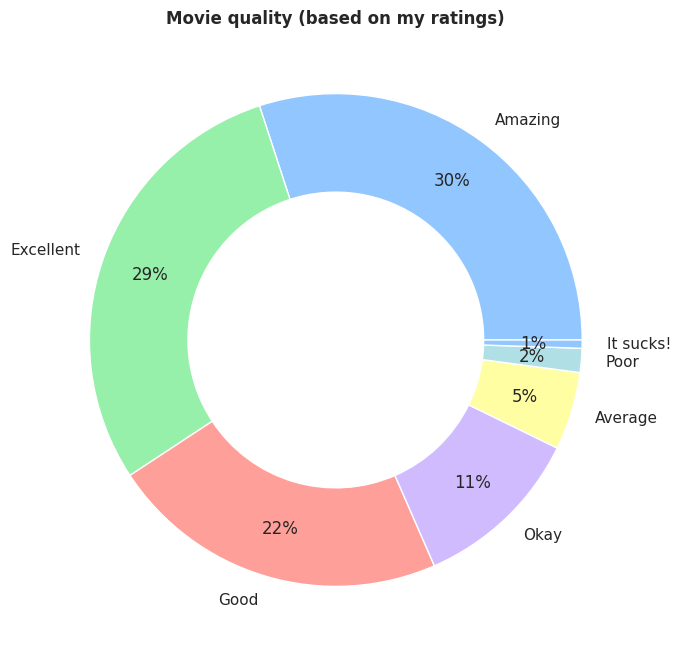

In [29]:
# Displaying the movie rating classification based on the algorithm above:
df['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality (based on my ratings)', fontweight = 'bold')
plt.show()

In [30]:
# Generating an average rating (based on the sum of the IMDb average rating and My Rating):
def average_rating(row):
  imdb_rating = row['IMDb Rating']
  my_rating = row['Your Rating']
  average_rating = (imdb_rating + my_rating) / 2
  return average_rating

# Applying the function above on a column of the dataset and generating a new column as result:
df['Average Rating'] = df.apply(average_rating, axis=1)
df.head()

Your Rating Date Rated                      Title  \
0          6.0 2024-05-09          A Boy and His Dog   
1          7.0 2024-05-09          The Monster Squad   
2          7.0 2024-05-08                   D.C. Cab   
3         10.0 2024-05-06  The Man Who Knew Too Much   
4          8.0 2024-05-05              Lilo & Stitch   

              Original Title Title Type  IMDb Rating  Runtime (mins)    Year  \
0          A Boy and His Dog      Movie          6.4            91.0  1975.0   
1          The Monster Squad      Movie          6.9            82.0  1987.0   
2                   D.C. Cab      Movie          5.5           100.0  1983.0   
3  The Man Who Knew Too Much      Movie          7.4           120.0  1956.0   
4              Lilo & Stitch      Movie          7.3            85.0  2002.0   

                                              Genres  Num Votes  \
0                    Drama, Thriller, Comedy, Sci-Fi    19264.0   
1                    Action, Fantasy, Horror, Comedy    35343.0   
2                                     Comedy, Action     5268.0   
3                                    Drama, Thriller    69675.0   
4  Animation, Adventure, Comedy, Drama, Fantasy, ...   212000.0   

          Release Date                   Directors  Day Rated  Month Rated  \
0  1975-11-14 00:00:00                  L.Q. Jones        9.0          5.0   
1  1987-08-14 00:00:00                 Fred Dekker        9.0          5.0   
2  1983-12-16 00:00:00             Joel Schumacher        8.0          5.0   
3  1956-06-01 00:00:00            Alfred Hitchcock        6.0          5.0   
4  2002-06-21 00:00:00  Dean DeBlois,Chris Sanders        5.0          5.0   

   Year Rated Decade    Quality  Average Rating  
0      2024.0  1970s       Okay            6.20  
1      2024.0  1980s       Good            6.95  
2      2024.0  1980s       Good            6.25  
3      2024.0  1950s  Excellent            8.70  
4      2024.0  2000s    Amazing            7.65

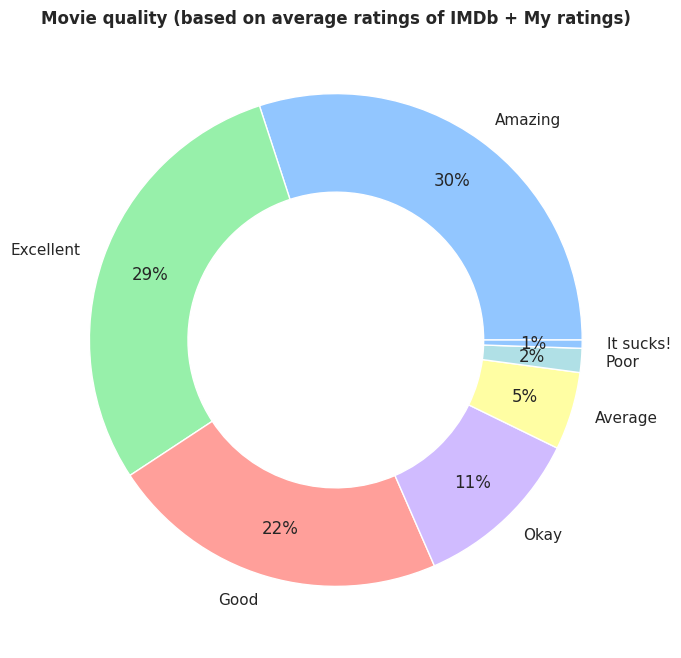

In [31]:
# Displaying the movie rating classification based on the algorithm above:
df['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality (based on average ratings of IMDb + My ratings)', fontweight = 'bold')
plt.show()

In [32]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes >= 2000000:
    popularity = 'Over 2M votes'
  elif num_votes >= 1000000 and num_votes < 2000000:
    popularity = 'Over 1M votes'
  elif num_votes >= 500000 and num_votes < 750000:
    popularity = 'Over 500k votes'
  elif num_votes >= 250000 and num_votes < 500000:
    popularity = 'Over 250k votes'
  elif num_votes >= 100000 and num_votes < 250000:
    popularity = 'Over 100k votes'
  elif num_votes >= 10000 and num_votes < 100000:
    popularity = 'Over 10k votes'
  else:
    popularity = 'Less than 10k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie popularity'] = df['Num Votes'].apply(movie_popularity)
df.head()

Your Rating Date Rated                      Title  \
0          6.0 2024-05-09          A Boy and His Dog   
1          7.0 2024-05-09          The Monster Squad   
2          7.0 2024-05-08                   D.C. Cab   
3         10.0 2024-05-06  The Man Who Knew Too Much   
4          8.0 2024-05-05              Lilo & Stitch   

              Original Title Title Type  IMDb Rating  Runtime (mins)    Year  \
0          A Boy and His Dog      Movie          6.4            91.0  1975.0   
1          The Monster Squad      Movie          6.9            82.0  1987.0   
2                   D.C. Cab      Movie          5.5           100.0  1983.0   
3  The Man Who Knew Too Much      Movie          7.4           120.0  1956.0   
4              Lilo & Stitch      Movie          7.3            85.0  2002.0   

                                              Genres  Num Votes  \
0                    Drama, Thriller, Comedy, Sci-Fi    19264.0   
1                    Action, Fantasy, Horror, Comedy    35343.0   
2                                     Comedy, Action     5268.0   
3                                    Drama, Thriller    69675.0   
4  Animation, Adventure, Comedy, Drama, Fantasy, ...   212000.0   

          Release Date                   Directors  Day Rated  Month Rated  \
0  1975-11-14 00:00:00                  L.Q. Jones        9.0          5.0   
1  1987-08-14 00:00:00                 Fred Dekker        9.0          5.0   
2  1983-12-16 00:00:00             Joel Schumacher        8.0          5.0   
3  1956-06-01 00:00:00            Alfred Hitchcock        6.0          5.0   
4  2002-06-21 00:00:00  Dean DeBlois,Chris Sanders        5.0          5.0   

   Year Rated Decade    Quality  Average Rating     Movie popularity  
0      2024.0  1970s       Okay            6.20       Over 10k votes  
1      2024.0  1980s       Good            6.95       Over 10k votes  
2      2024.0  1980s       Good            6.25  Less than 10k votes  
3      2024.0  1950s  Excellent            8.70       Over 10k votes  
4      2024.0  2000s    Amazing            7.65      Over 100k votes

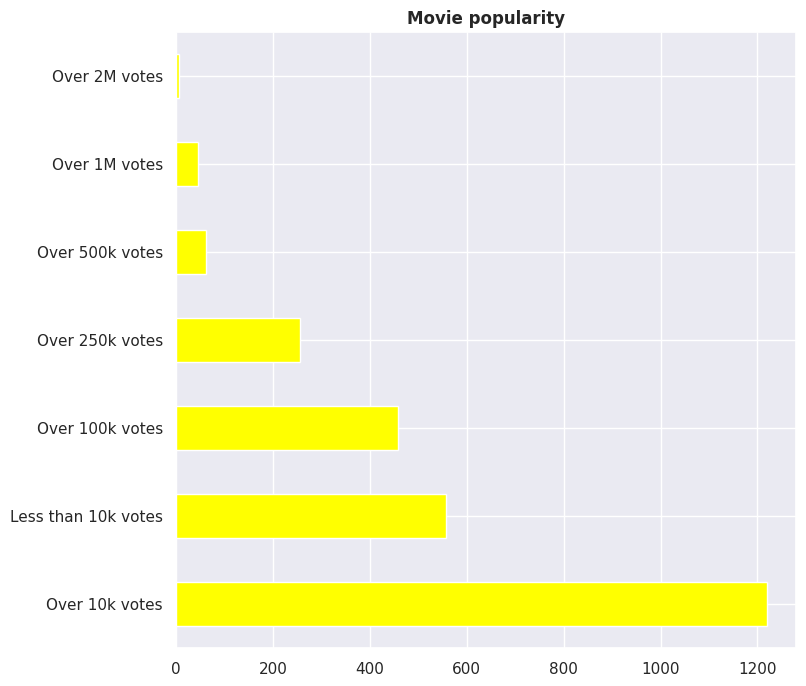

In [33]:
# Displaying the movie popularity based on the algorithm above:
df['Movie popularity'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [34]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie duration'] = df['Runtime (mins)'].apply(movie_duration)
df.head()

Your Rating Date Rated                      Title  \
0          6.0 2024-05-09          A Boy and His Dog   
1          7.0 2024-05-09          The Monster Squad   
2          7.0 2024-05-08                   D.C. Cab   
3         10.0 2024-05-06  The Man Who Knew Too Much   
4          8.0 2024-05-05              Lilo & Stitch   

              Original Title Title Type  IMDb Rating  Runtime (mins)    Year  \
0          A Boy and His Dog      Movie          6.4            91.0  1975.0   
1          The Monster Squad      Movie          6.9            82.0  1987.0   
2                   D.C. Cab      Movie          5.5           100.0  1983.0   
3  The Man Who Knew Too Much      Movie          7.4           120.0  1956.0   
4              Lilo & Stitch      Movie          7.3            85.0  2002.0   

                                              Genres  Num Votes  \
0                    Drama, Thriller, Comedy, Sci-Fi    19264.0   
1                    Action, Fantasy, Horror, Comedy    35343.0   
2                                     Comedy, Action     5268.0   
3                                    Drama, Thriller    69675.0   
4  Animation, Adventure, Comedy, Drama, Fantasy, ...   212000.0   

          Release Date                   Directors  Day Rated  Month Rated  \
0  1975-11-14 00:00:00                  L.Q. Jones        9.0          5.0   
1  1987-08-14 00:00:00                 Fred Dekker        9.0          5.0   
2  1983-12-16 00:00:00             Joel Schumacher        8.0          5.0   
3  1956-06-01 00:00:00            Alfred Hitchcock        6.0          5.0   
4  2002-06-21 00:00:00  Dean DeBlois,Chris Sanders        5.0          5.0   

   Year Rated Decade    Quality  Average Rating     Movie popularity  \
0      2024.0  1970s       Okay            6.20       Over 10k votes   
1      2024.0  1980s       Good            6.95       Over 10k votes   
2      2024.0  1980s       Good            6.25  Less than 10k votes   
3      2024.0  1950s  Excellent            8.70       Over 10k votes   
4      2024.0  2000s    Amazing            7.65      Over 100k votes   

          Movie duration  
0  Between 1h30 and 1h39  
1  Between 1h10 and 1h29  
2  Between 1h40 and 1h59  
3    Between 2h and 2h29  
4  Between 1h10 and 1h29

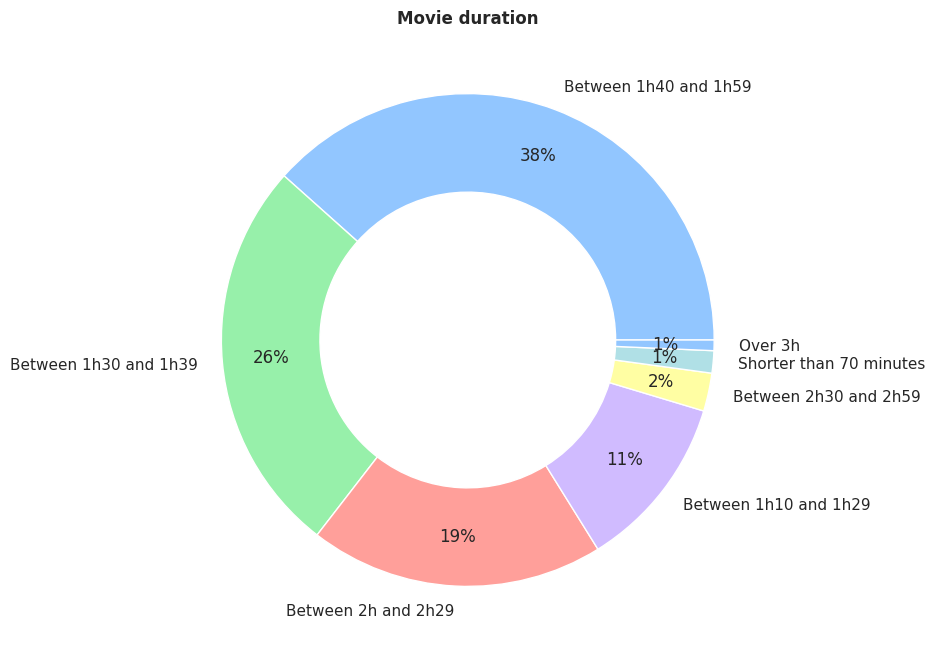

In [35]:
# Displaying the movie duration based on the algorithm above:
df['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [36]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
df['Year Quartile Rated'] = df['Month Rated'].apply(year_quartile)
df.head()

Your Rating Date Rated                      Title  \
0          6.0 2024-05-09          A Boy and His Dog   
1          7.0 2024-05-09          The Monster Squad   
2          7.0 2024-05-08                   D.C. Cab   
3         10.0 2024-05-06  The Man Who Knew Too Much   
4          8.0 2024-05-05              Lilo & Stitch   

              Original Title Title Type  IMDb Rating  Runtime (mins)    Year  \
0          A Boy and His Dog      Movie          6.4            91.0  1975.0   
1          The Monster Squad      Movie          6.9            82.0  1987.0   
2                   D.C. Cab      Movie          5.5           100.0  1983.0   
3  The Man Who Knew Too Much      Movie          7.4           120.0  1956.0   
4              Lilo & Stitch      Movie          7.3            85.0  2002.0   

                                              Genres  Num Votes  ...  \
0                    Drama, Thriller, Comedy, Sci-Fi    19264.0  ...   
1                    Action, Fantasy, Horror, Comedy    35343.0  ...   
2                                     Comedy, Action     5268.0  ...   
3                                    Drama, Thriller    69675.0  ...   
4  Animation, Adventure, Comedy, Drama, Fantasy, ...   212000.0  ...   

                    Directors Day Rated  Month Rated  Year Rated  Decade  \
0                  L.Q. Jones       9.0          5.0      2024.0   1970s   
1                 Fred Dekker       9.0          5.0      2024.0   1980s   
2             Joel Schumacher       8.0          5.0      2024.0   1980s   
3            Alfred Hitchcock       6.0          5.0      2024.0   1950s   
4  Dean DeBlois,Chris Sanders       5.0          5.0      2024.0   2000s   

     Quality Average Rating     Movie popularity         Movie duration  \
0       Okay           6.20       Over 10k votes  Between 1h30 and 1h39   
1       Good           6.95       Over 10k votes  Between 1h10 and 1h29   
2       Good           6.25  Less than 10k votes  Between 1h40 and 1h59   
3  Excellent           8.70       Over 10k votes    Between 2h and 2h29   
4    Amazing           7.65      Over 100k votes  Between 1h10 and 1h29   

  Year Quartile Rated  
0              Second  
1              Second  
2              Second  
3              Second  
4              Second  

[5 rows x 21 columns]

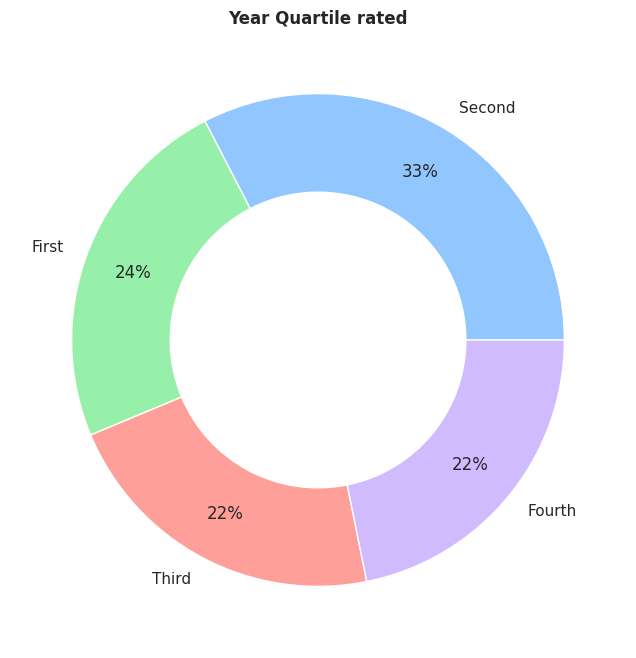

In [37]:
# Displaying the quartile the movie was added based on the algorithm above:
df['Year Quartile Rated'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile rated', fontweight = 'bold')
plt.show()

In [38]:
# Classifying the movies by the month half rated based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
df['Month Half Rated'] = df['Day Rated'].apply(month_half)
df.head()

Your Rating Date Rated                      Title  \
0          6.0 2024-05-09          A Boy and His Dog   
1          7.0 2024-05-09          The Monster Squad   
2          7.0 2024-05-08                   D.C. Cab   
3         10.0 2024-05-06  The Man Who Knew Too Much   
4          8.0 2024-05-05              Lilo & Stitch   

              Original Title Title Type  IMDb Rating  Runtime (mins)    Year  \
0          A Boy and His Dog      Movie          6.4            91.0  1975.0   
1          The Monster Squad      Movie          6.9            82.0  1987.0   
2                   D.C. Cab      Movie          5.5           100.0  1983.0   
3  The Man Who Knew Too Much      Movie          7.4           120.0  1956.0   
4              Lilo & Stitch      Movie          7.3            85.0  2002.0   

                                              Genres  Num Votes  ...  \
0                    Drama, Thriller, Comedy, Sci-Fi    19264.0  ...   
1                    Action, Fantasy, Horror, Comedy    35343.0  ...   
2                                     Comedy, Action     5268.0  ...   
3                                    Drama, Thriller    69675.0  ...   
4  Animation, Adventure, Comedy, Drama, Fantasy, ...   212000.0  ...   

  Day Rated Month Rated  Year Rated  Decade    Quality Average Rating  \
0       9.0         5.0      2024.0   1970s       Okay           6.20   
1       9.0         5.0      2024.0   1980s       Good           6.95   
2       8.0         5.0      2024.0   1980s       Good           6.25   
3       6.0         5.0      2024.0   1950s  Excellent           8.70   
4       5.0         5.0      2024.0   2000s    Amazing           7.65   

      Movie popularity         Movie duration Year Quartile Rated  \
0       Over 10k votes  Between 1h30 and 1h39              Second   
1       Over 10k votes  Between 1h10 and 1h29              Second   
2  Less than 10k votes  Between 1h40 and 1h59              Second   
3       Over 10k votes    Between 2h and 2h29              Second   
4      Over 100k votes  Between 1h10 and 1h29              Second   

  Month Half Rated  
0            First  
1            First  
2            First  
3            First  
4            First  

[5 rows x 22 columns]

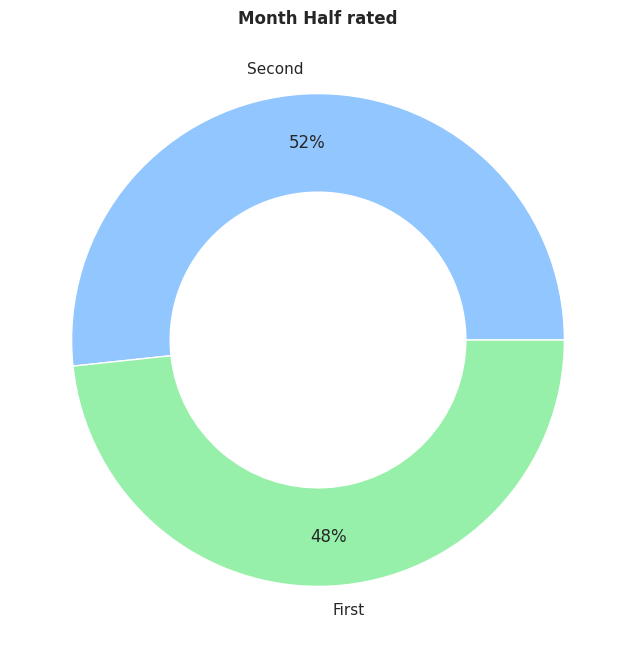

In [39]:
# Displaying the month half the movie was added based on the algorithm above:
df['Month Half Rated'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half rated', fontweight = 'bold')
plt.show()

In [41]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Check the data type of the 'Genres' column
if df['Genres'].dtype != 'str':
    df['Genres'] = df['Genres'].astype(str)

# Splitting the genres by comma and removing leading spaces:
df['Genres'] = df['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
df = df.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = df.index, columns = df['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [42]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action        1908   694
Adventure     2203   399
Animation     2539    63
Biography     2448   154
Comedy        2082   520
Crime         1796   806
Documentary   2595     7
Drama         1072  1530
Family        2437   165
Fantasy       2406   196
Film-Noir     2597     5
History       2520    82
Horror        2077   525
Music         2557    45
Musical       2575    27
Mystery       2067   535
Romance       2292   310
Sci-Fi        2369   233
Short         2598     4
Sport         2499   103
Thriller      1280  1322
War           2498   104
Western       2519    83
nan           2601     1


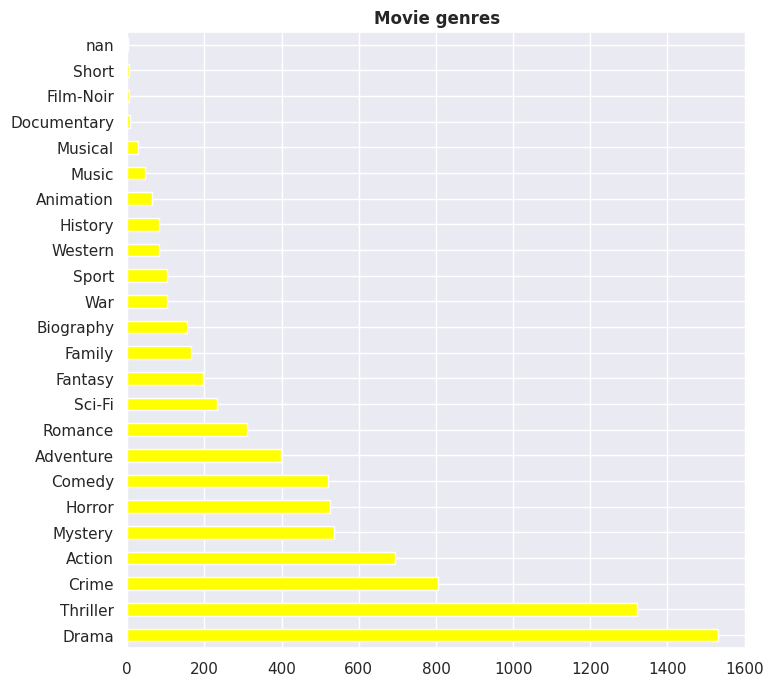

In [43]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [44]:
# Displaying the datatypes of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7913 entries, 0 to 2601
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Your Rating          7913 non-null   float64       
 1   Date Rated           7912 non-null   datetime64[ns]
 2   Title                7912 non-null   object        
 3   Original Title       7912 non-null   object        
 4   Title Type           7912 non-null   object        
 5   IMDb Rating          7913 non-null   float64       
 6   Runtime (mins)       7843 non-null   float64       
 7   Year                 7912 non-null   float64       
 8   Genres               7913 non-null   object        
 9   Num Votes            7913 non-null   float64       
 10  Release Date         7912 non-null   object        
 11  Directors            7816 non-null   object        
 12  Day Rated            7912 non-null   float64       
 13  Month Rated          7912 non-null   f

In [45]:
df = df[df['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
df['Directors'] = df['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
df = df.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = df.index, columns = df['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-45-58634f6b3413>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Directors'] = df['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [46]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                 False  True
Aaron Hann        2572     0
Aaron Harvey      2572     0
Aaron Moorhead    2572     0
Aaron Woodley     2572     0
Abel Ferrara      2569     0
...                ...   ...
Yuval Adler       2572     0
Zach Cregger      2572     0
Zachary Donohue   2572     0
Zack Snyder       2572     0
Zak Hilditch      2571     0

[1380 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


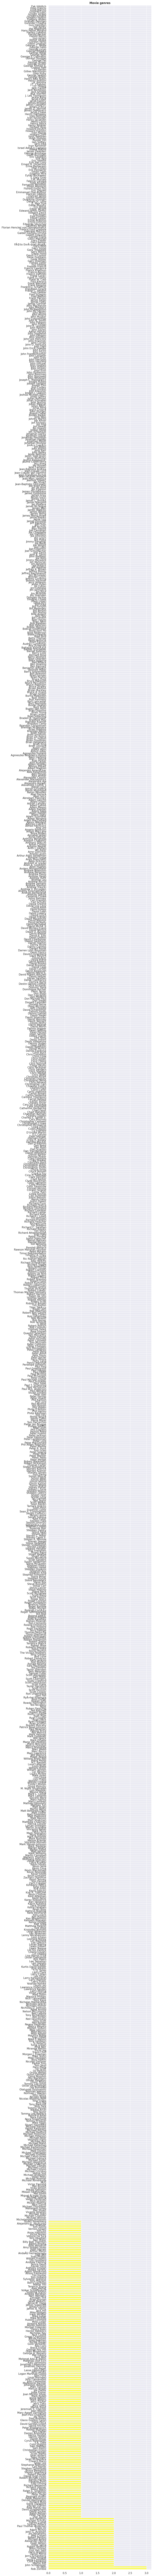

In [50]:
# Displaying the proportions of the directors present in the dataset:
final_directors_counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 200))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()